# Data Cleaning

In this notebook, we clean the data that will be used. The "cleaning" includes looking for missing data and outliers.

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
pd.plotting.register_matplotlib_converters()
warnings.simplefilter(action='ignore', category=FutureWarning)

Reading the csv files for 3 battery cells (respectively cells 0, 1, 2, 3 and 4 from batch 1).

In [54]:
c0 = pd.read_csv('./Data/b1c0_summary.csv', index_col='cycle')
c1 = pd.read_csv('./Data/b1c1_summary.csv', index_col='cycle')
c2 = pd.read_csv('./Data/b1c2_summary.csv', index_col='cycle')
c3 = pd.read_csv('./Data/b1c3_summary.csv', index_col='cycle')
c4 = pd.read_csv('./Data/b1c4_summary.csv', index_col='cycle')

In [55]:
c0 = c0.drop('Unnamed: 0', axis=1)
c1 = c1.drop('Unnamed: 0', axis=1)
c2 = c2.drop('Unnamed: 0', axis=1)
c3 = c3.drop('Unnamed: 0', axis=1)
c4 = c4.drop('Unnamed: 0', axis=1)

For each cell, we check if there is any missing values.

In [56]:
c0.isnull().sum()[:]


IR            0
QC            0
QD            0
Tavg          0
Tmin          0
Tmax          0
chargetime    0
dtype: int64

In [57]:
c1.isnull().sum()[:]

IR            0
QC            0
QD            0
Tavg          0
Tmin          0
Tmax          0
chargetime    0
dtype: int64

In [58]:
c2.isnull().sum()[:]

IR            0
QC            0
QD            0
Tavg          0
Tmin          0
Tmax          0
chargetime    0
dtype: int64

In [59]:
c3.isnull().sum()[:]

IR            0
QC            0
QD            0
Tavg          0
Tmin          0
Tmax          0
chargetime    0
dtype: int64

In [60]:
c4.isnull().sum()[:]

IR            0
QC            0
QD            0
Tavg          0
Tmin          0
Tmax          0
chargetime    0
dtype: int64

Although there isn't any missing values, we take a look at the values and their tendency to check for outliers.

#### Cycle vs IR graphics

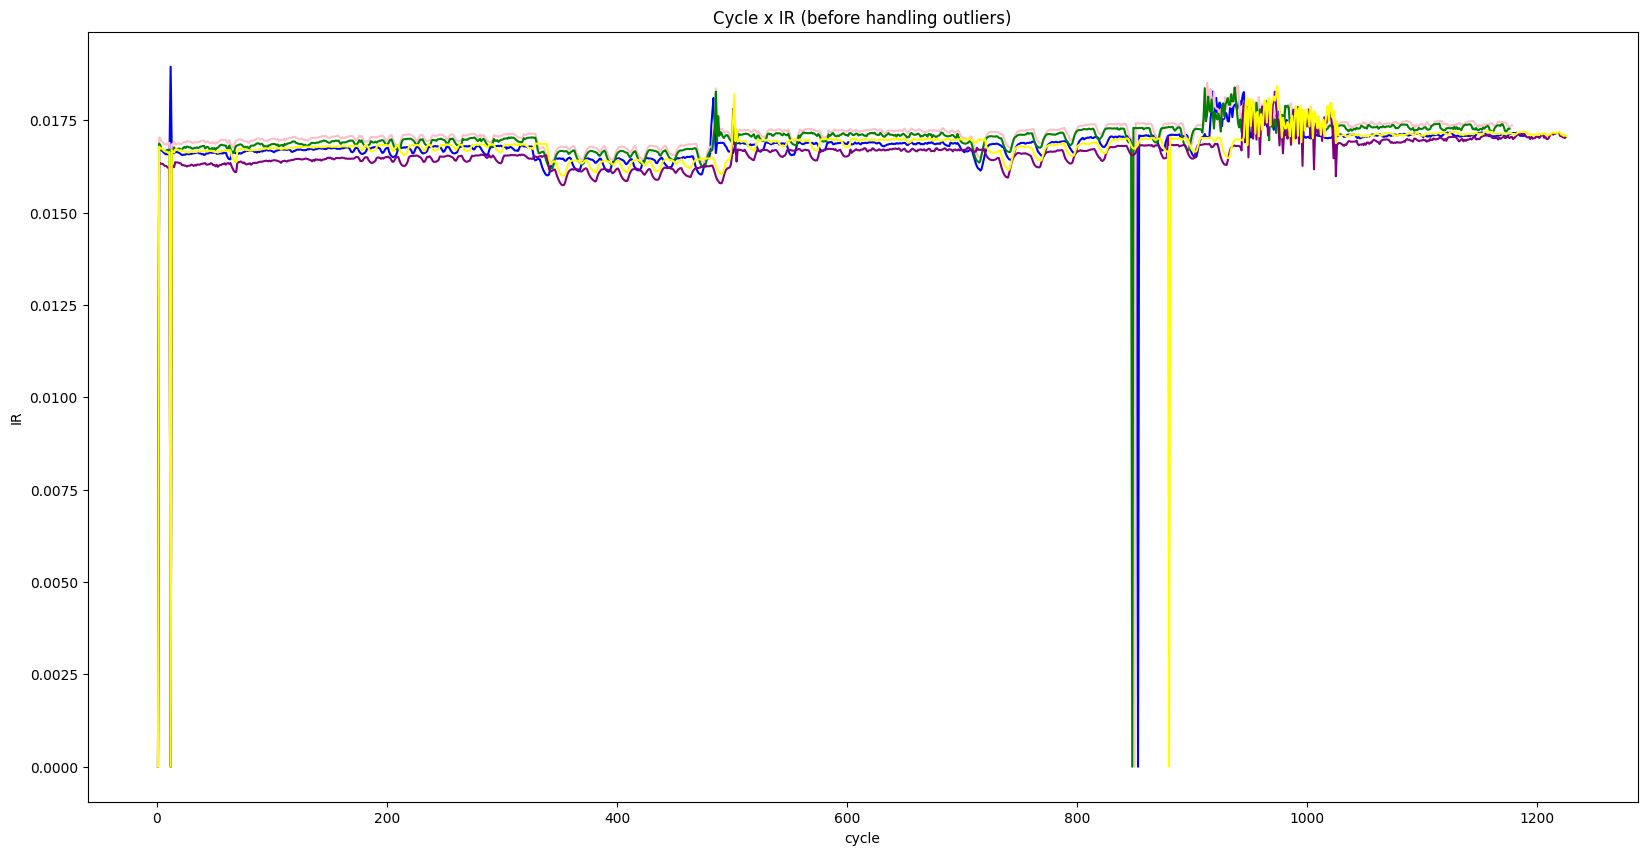

In [61]:
plt.title("Cycle x IR (before handling outliers)")
sns.lineplot(data=c0, x='cycle', y='IR', color='blue')
sns.lineplot(data=c1, x='cycle', y='IR', color='pink')
sns.lineplot(data=c2, x='cycle', y='IR', color='green')
sns.lineplot(data=c3, x='cycle', y='IR', color='purple')
sns.lineplot(data=c4, x='cycle', y='IR', color='yellow')
plt.gcf().set_size_inches(20, 10)

As we can see, in all 3 battery cells, there are Internal Resistance measurements that seems to be outliers. If we check the cycle where it occurs, we can see that it is around the same for all of them (cycle 12 and cycle 848~880). It is highly unlikely that IR=0 is a true physical measurement. In a matter of fact, as the battery ages (more cycles), the Internal Resistance tends to increase.

In [62]:
for idx, row in c0.iterrows():
    if row['IR'] == 0 and not idx==1:
        print('Cell 0: ', idx)
for idx, row in c1.iterrows():
    if row['IR'] == 0 and not idx==1:
        print('Cell 1: ', idx)
for idx, row in c2.iterrows():
    if row['IR'] == 0 and not idx==1:
        print('Cell 2: ', idx)
for idx, row in c3.iterrows():
    if row['IR'] == 0 and not idx==1:
        print('Cell 3: ', idx)
for idx, row in c4.iterrows():
    if row['IR'] == 0 and not idx==1:
        print('Cell 4: ', idx)

Cell 0:  853.0
Cell 1:  12.0
Cell 1:  850.0
Cell 2:  12.0
Cell 2:  848.0
Cell 3:  12.0
Cell 4:  12.0
Cell 4:  880.0


We will hand these missing values by applying to them the mean value for 2 cycles down and 2 cycles above.

In [63]:
c0.loc[12]['IR'] = (c0.loc[9]['IR']+c0.loc[10]['IR']+c0.loc[12]['IR']+c0.loc[13]['IR'])/4
c0.loc[853]['IR'] = (c0.loc[851]['IR']+c0.loc[852]['IR']+c0.loc[854]['IR']+c0.loc[855]['IR'])/4

c1.loc[12]['IR'] = (c1.loc[10]['IR']+c1.loc[11]['IR']+c1.loc[13]['IR']+c1.loc[14]['IR'])/4
c1.loc[850]['IR'] = (c1.loc[848]['IR']+c1.loc[849]['IR']+c1.loc[851]['IR']+c1.loc[852]['IR'])/4

c2.loc[12]['IR'] = (c2.loc[10]['IR']+c2.loc[11]['IR']+c2.loc[13]['IR']+c2.loc[14]['IR'])/4
c2.loc[848]['IR'] = (c2.loc[846]['IR']+c2.loc[847]['IR']+c2.loc[849]['IR']+c2.loc[850]['IR'])/4

c3.loc[12]['IR'] = (c3.loc[10]['IR']+c3.loc[11]['IR']+c3.loc[13]['IR']+c3.loc[14]['IR'])/4

c4.loc[12]['IR'] = (c4.loc[10]['IR']+c4.loc[11]['IR']+c4.loc[13]['IR']+c4.loc[14]['IR'])/4
c4.loc[880]['IR'] = (c4.loc[878]['IR']+c4.loc[879]['IR']+c4.loc[881]['IR']+c4.loc[882]['IR'])/4

Let's take a look at the graphics after handling the outliers. It seems more consistent now. Ignoring the first cycle, we are also able to take a closer look.

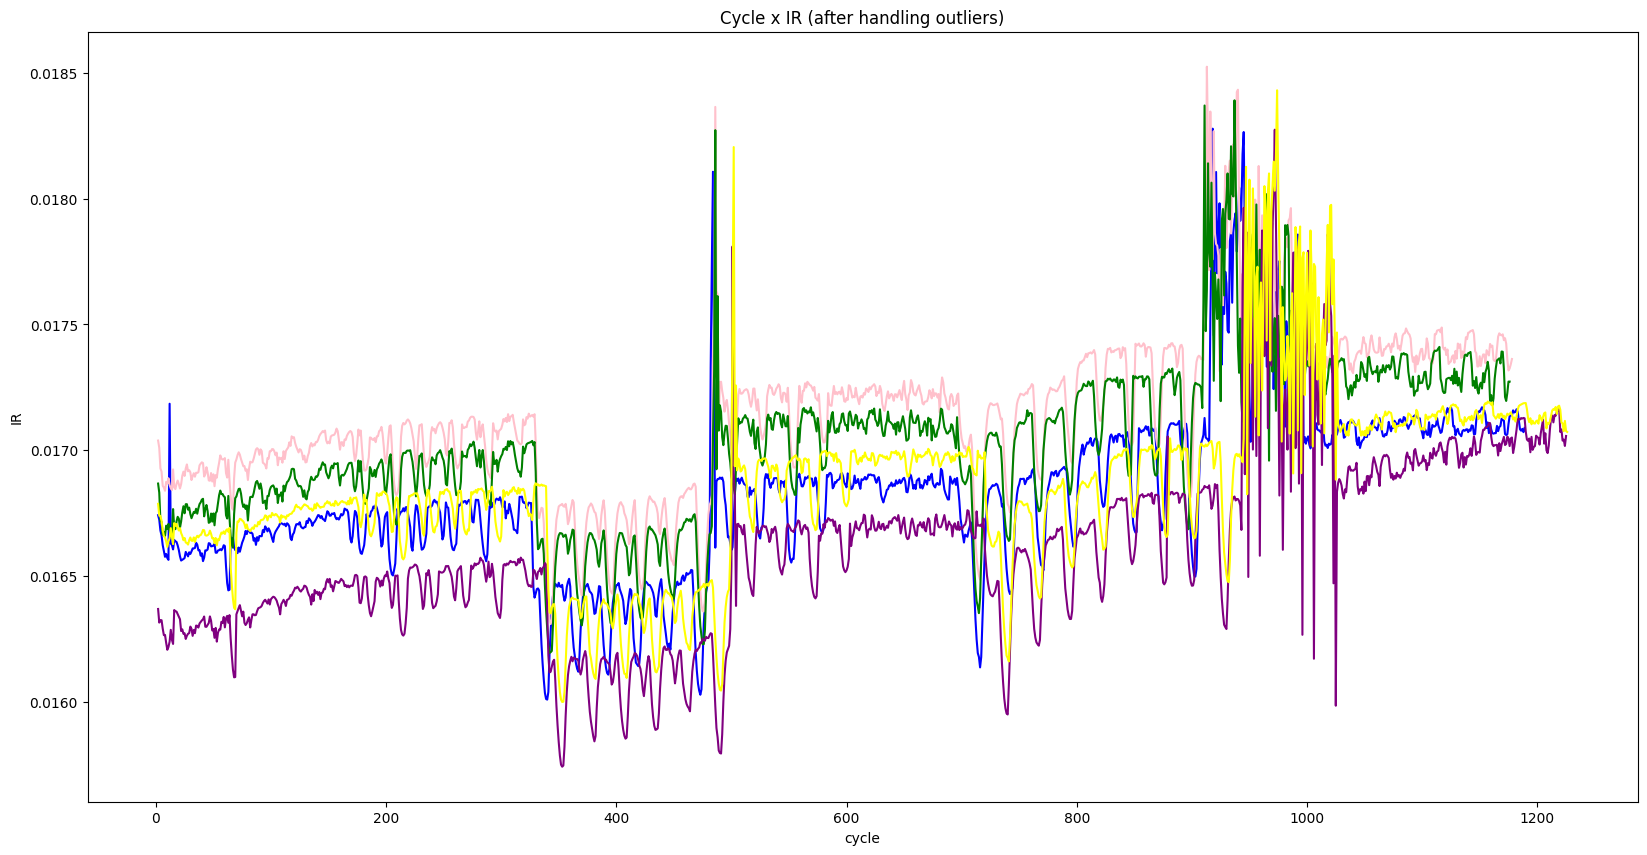

In [64]:
plt.title("Cycle x IR (after handling outliers)")
sns.lineplot(data=c0[2:], x='cycle', y='IR', color='blue')
sns.lineplot(data=c1[2:], x='cycle', y='IR', color='pink')
sns.lineplot(data=c2[2:], x='cycle', y='IR', color='green')
sns.lineplot(data=c3[2:], x='cycle', y='IR', color='purple')
sns.lineplot(data=c4[2:], x='cycle', y='IR', color='yellow')
plt.gcf().set_size_inches(20, 10)

#### Cycle vs QC graphics

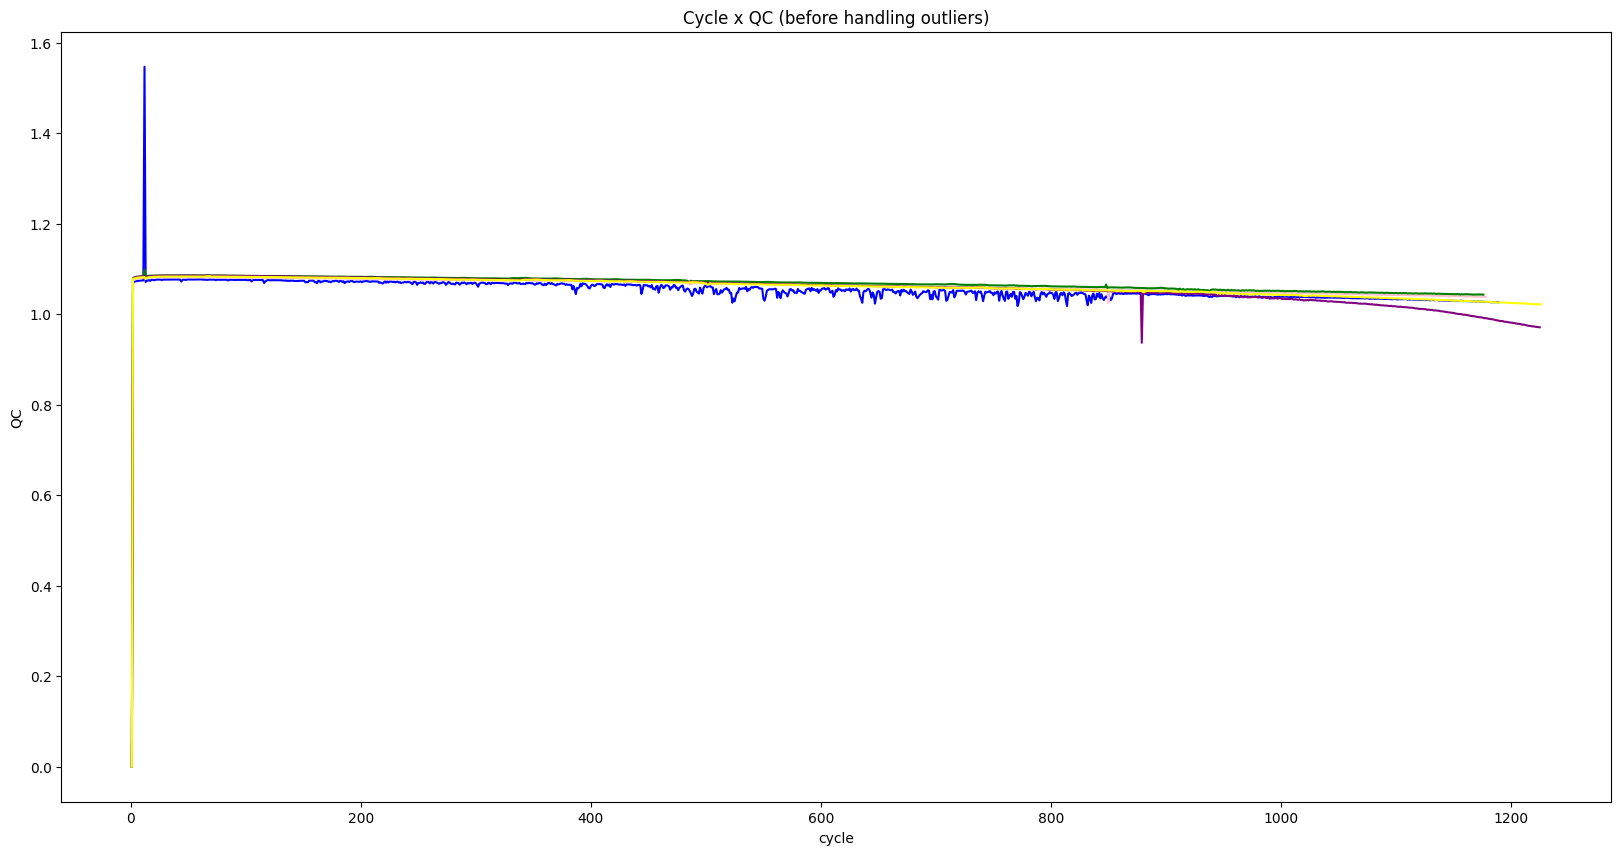

In [66]:
plt.title("Cycle x QC (before handling outliers)")
sns.lineplot(data=c0, x='cycle', y='QC', color='blue')
sns.lineplot(data=c1, x='cycle', y='QC', color='pink')
sns.lineplot(data=c2, x='cycle', y='QC', color='green')
sns.lineplot(data=c3, x='cycle', y='QC', color='purple')
sns.lineplot(data=c4, x='cycle', y='QC', color='yellow')
plt.gcf().set_size_inches(20, 10)

It looks like we have outliers at c0 and c3. Let's try to find out which cycle they correspond to.

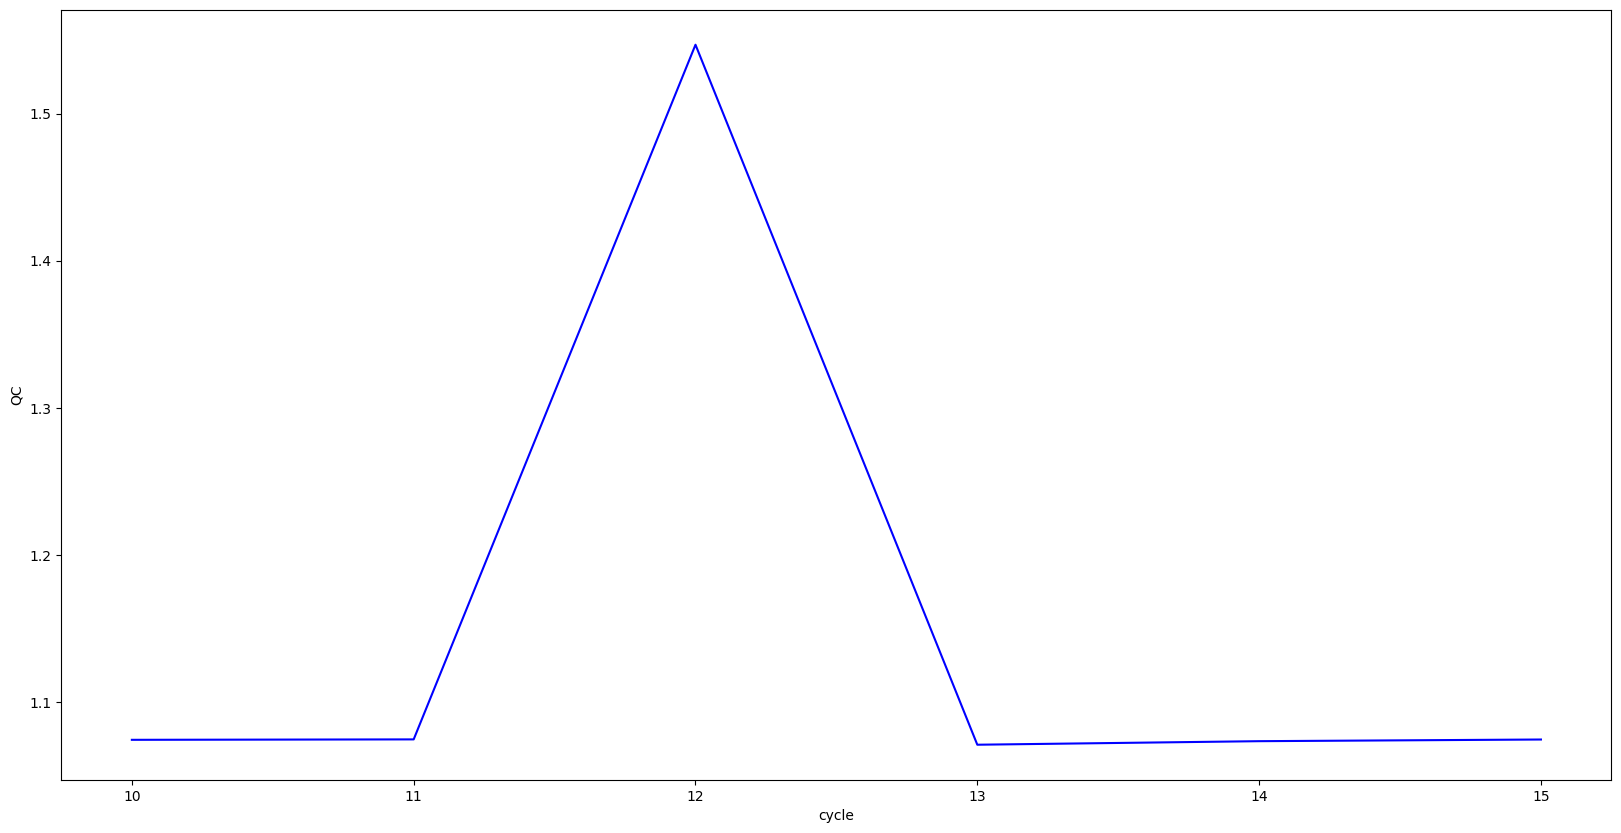

In [67]:
sns.lineplot(data=c0[10:15], x='cycle', y='QC', color='blue')
plt.gcf().set_size_inches(20, 10)

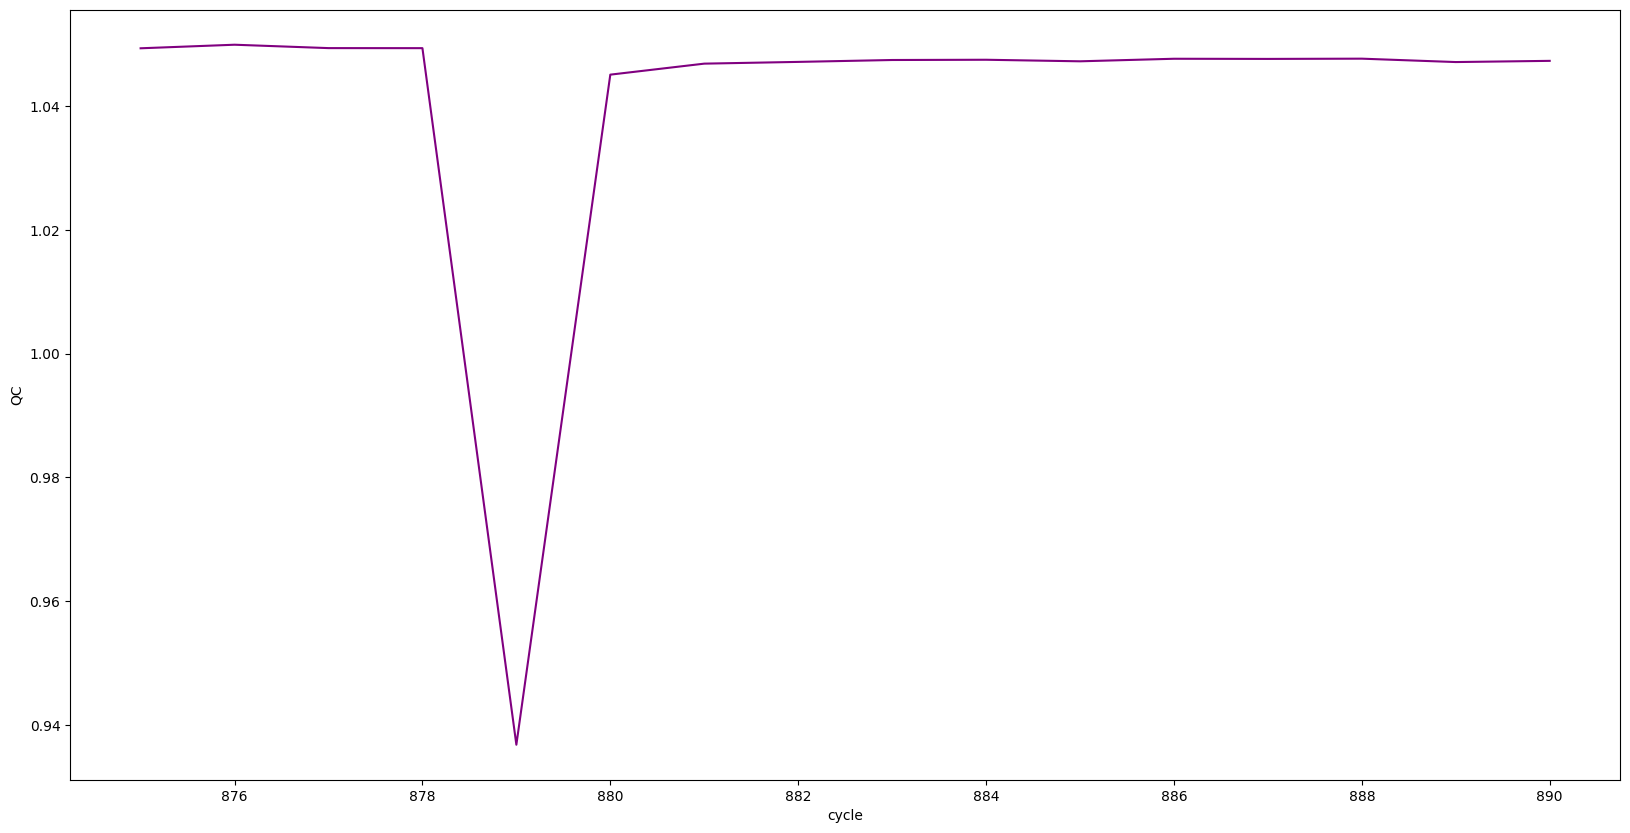

In [68]:
sns.lineplot(data=c3[875:890], x='cycle', y='QC', color='purple')
plt.gcf().set_size_inches(20, 10)

In this case, I will apply to the outliers the mean value from the previous and forward cycles.

In [83]:
c0.iloc[11]['QC'] = (c0.iloc[10]['QC']+c0.iloc[12]['QC'])/2
c3.iloc[878]['QC'] = (c3.iloc[877]['QC']+c3.iloc[879]['QC'])/2

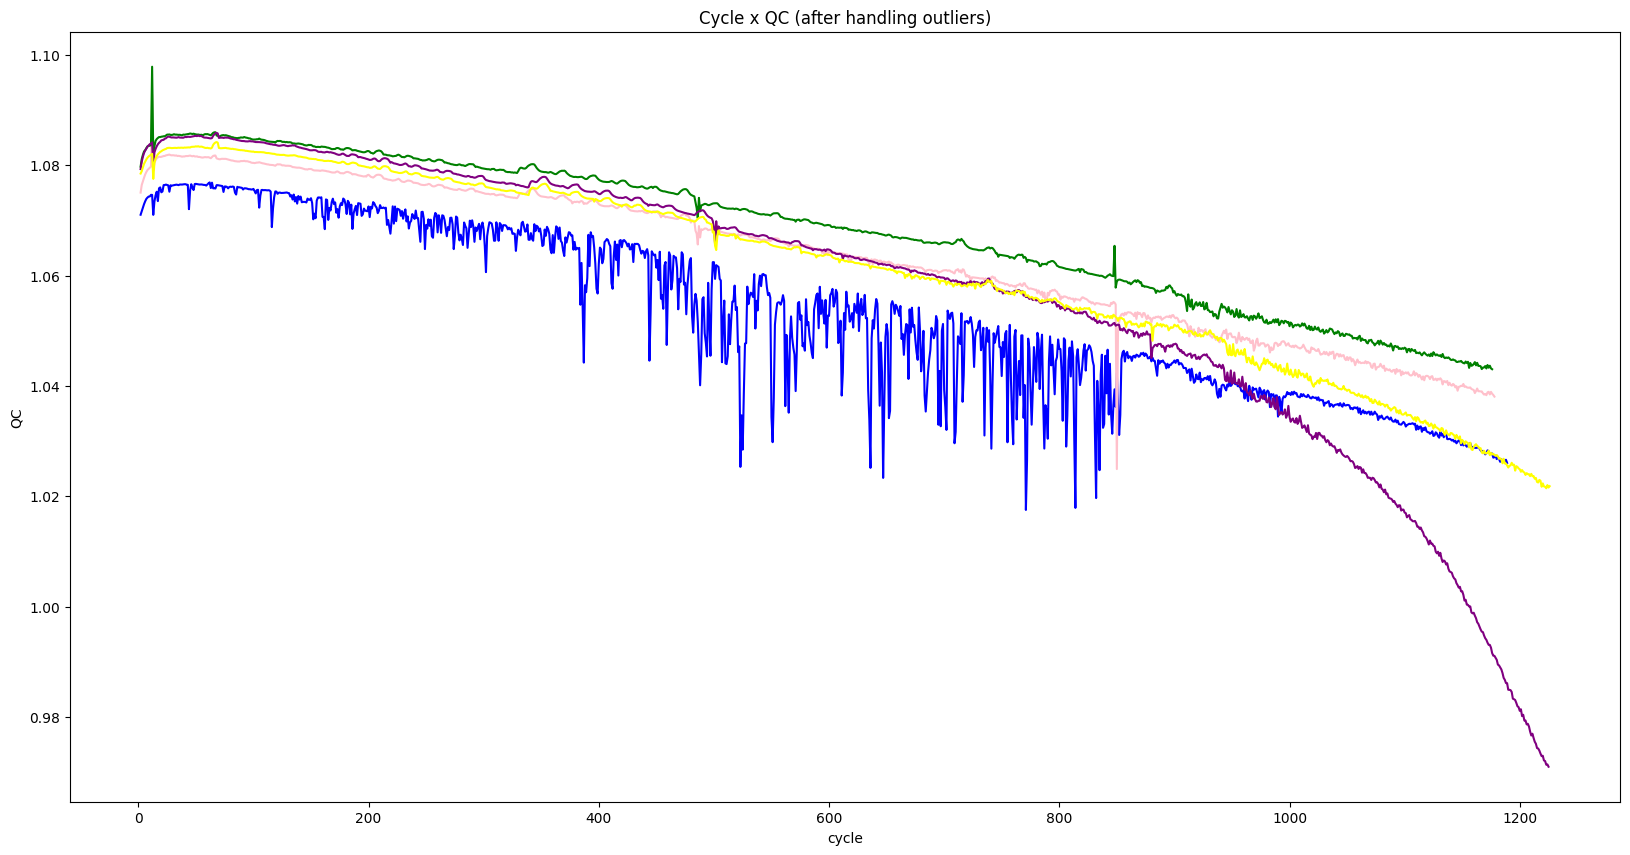

In [70]:
plt.title("Cycle x QC (after handling outliers)")
sns.lineplot(data=c0[2:], x='cycle', y='QC', color='blue')
sns.lineplot(data=c1[2:], x='cycle', y='QC', color='pink')
sns.lineplot(data=c2[2:], x='cycle', y='QC', color='green')
sns.lineplot(data=c3[2:], x='cycle', y='QC', color='purple')
sns.lineplot(data=c4[2:], x='cycle', y='QC', color='yellow')
plt.gcf().set_size_inches(20, 10)

#### Cycle vs QD graphics

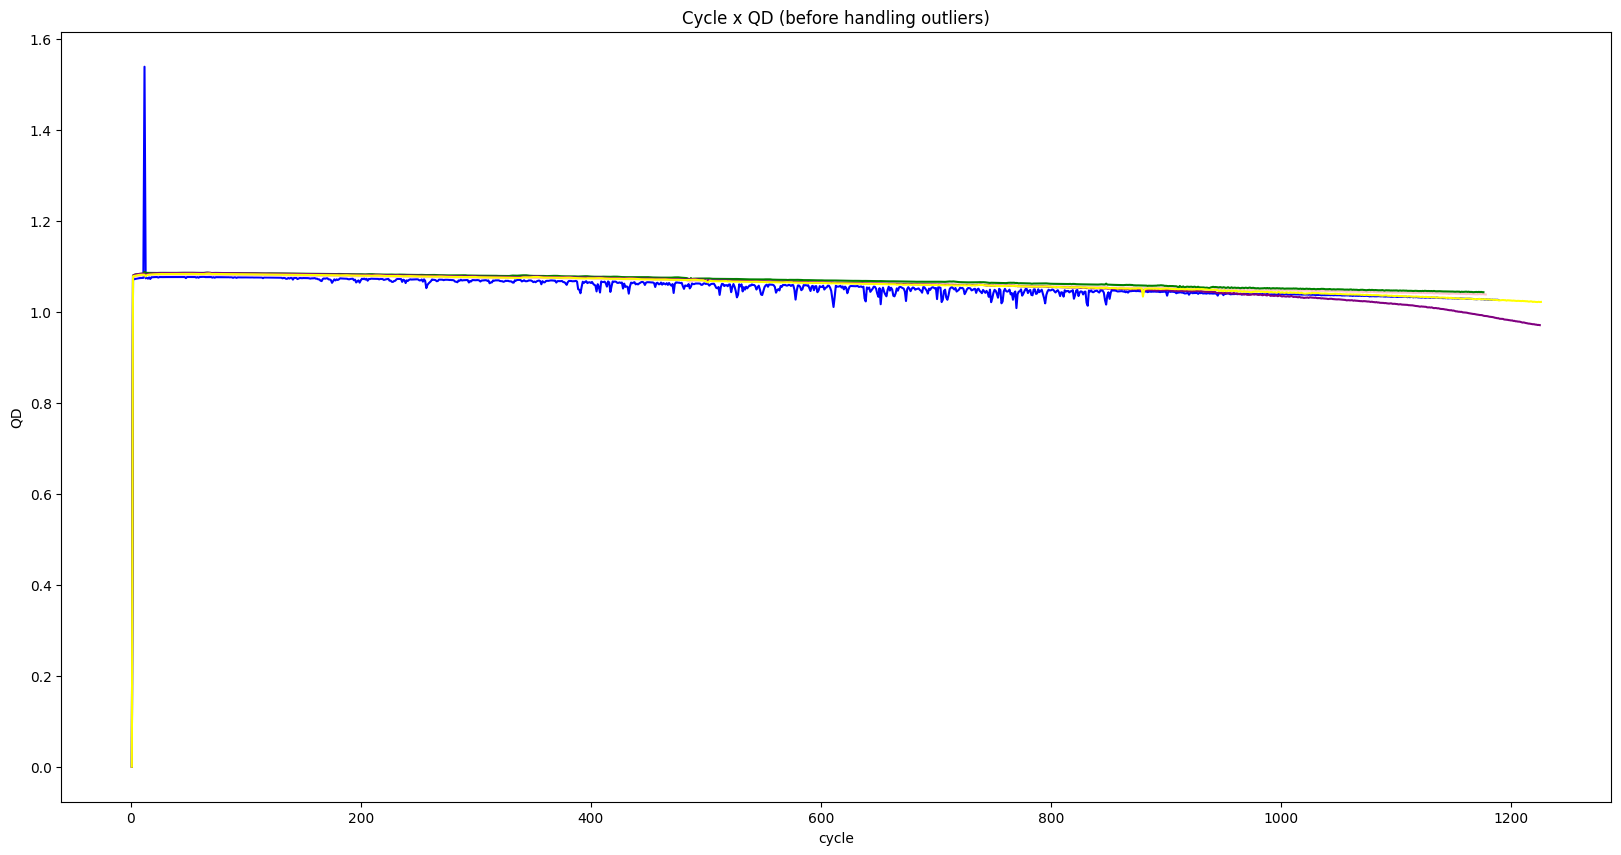

In [71]:
plt.title("Cycle x QD (before handling outliers)")
sns.lineplot(data=c0, x='cycle', y='QD', color='blue')
sns.lineplot(data=c1, x='cycle', y='QD', color='pink')
sns.lineplot(data=c2, x='cycle', y='QD', color='green')
sns.lineplot(data=c3, x='cycle', y='QD', color='purple')
sns.lineplot(data=c4, x='cycle', y='QD', color='yellow')
plt.gcf().set_size_inches(20, 10)

In [84]:
c0.iloc[11]['QD'] = (c0.iloc[10]['QD']+c0.iloc[12]['QD'])/2

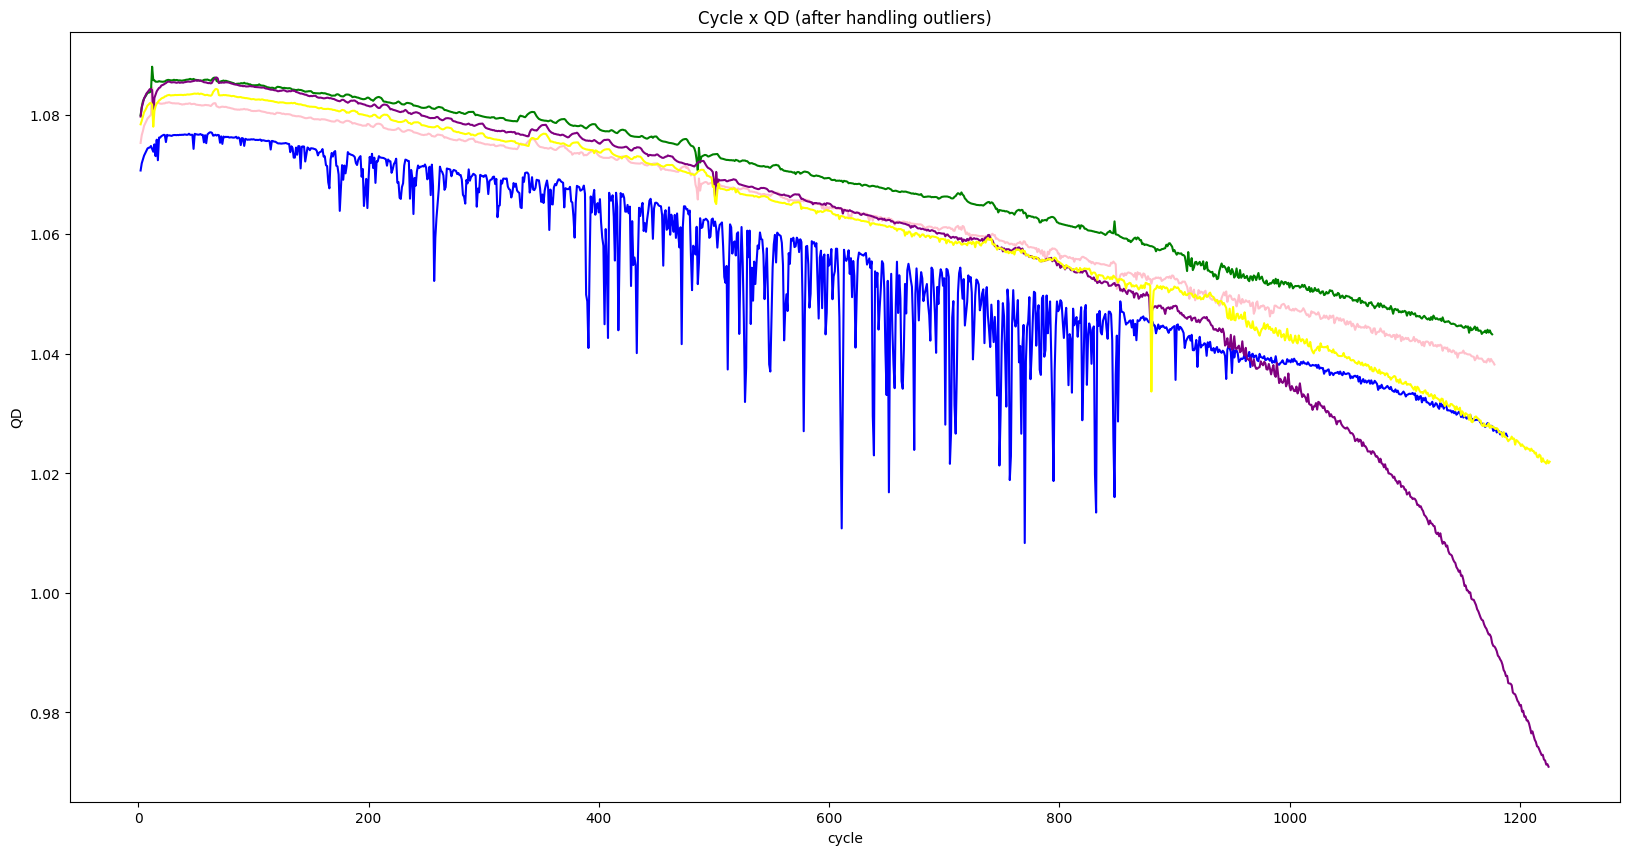

In [85]:
plt.title("Cycle x QD (after handling outliers)")
sns.lineplot(data=c0[2:], x='cycle', y='QD', color='blue')
sns.lineplot(data=c1[2:], x='cycle', y='QD', color='pink')
sns.lineplot(data=c2[2:], x='cycle', y='QD', color='green')
sns.lineplot(data=c3[2:], x='cycle', y='QD', color='purple')
sns.lineplot(data=c4[2:], x='cycle', y='QD', color='yellow')
plt.gcf().set_size_inches(20, 10)

#### Cycle vs chargetime graphics

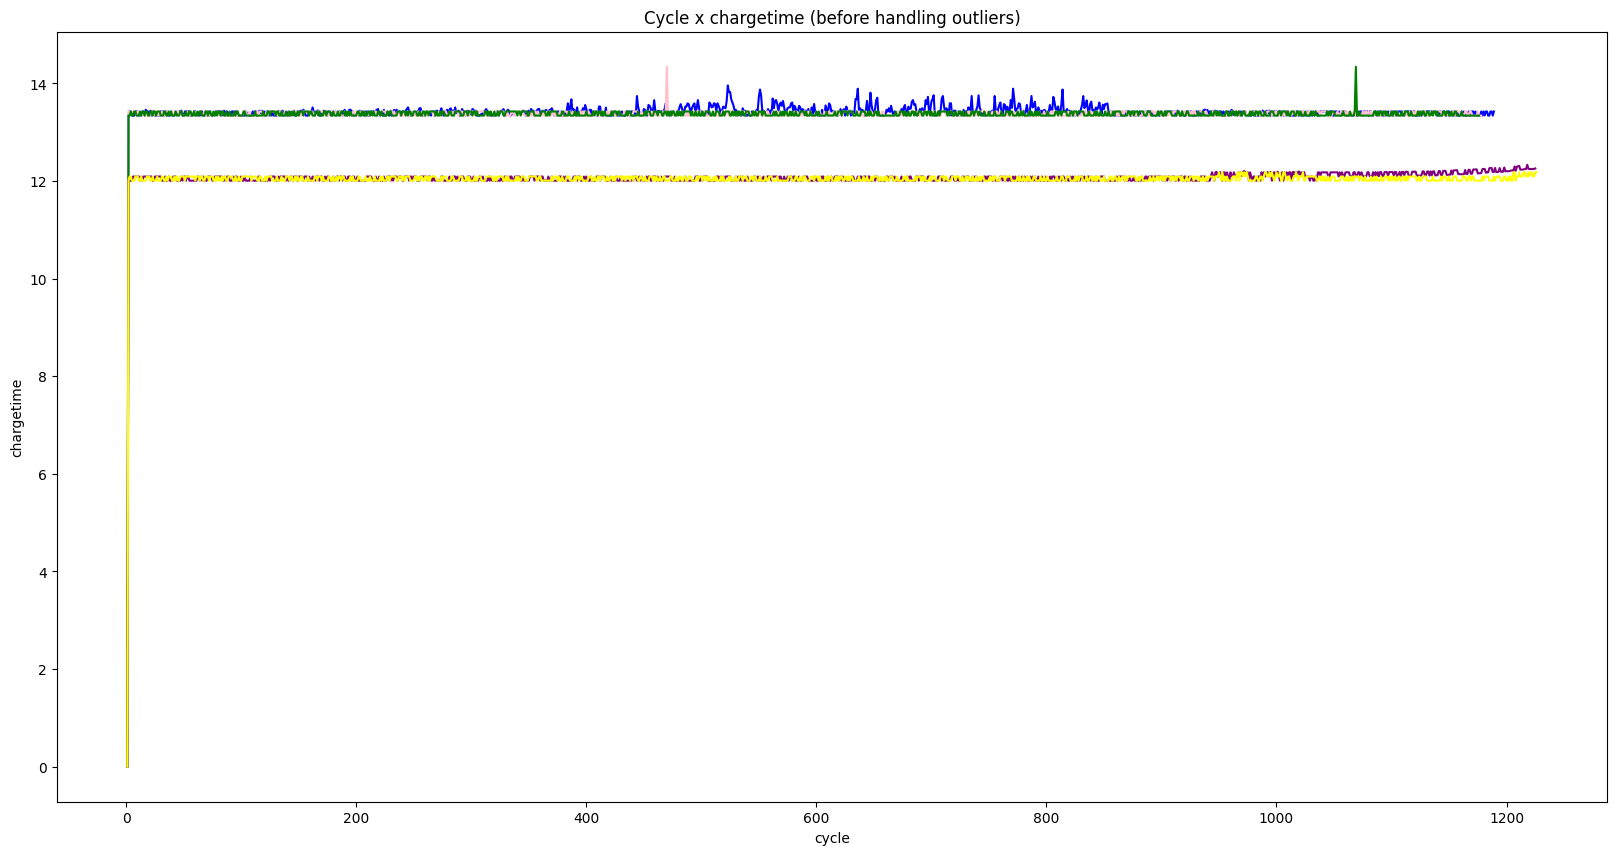

In [86]:
plt.title("Cycle x chargetime (before handling outliers)")
sns.lineplot(data=c0, x='cycle', y='chargetime', color='blue')
sns.lineplot(data=c1, x='cycle', y='chargetime', color='pink')
sns.lineplot(data=c2, x='cycle', y='chargetime', color='green')
sns.lineplot(data=c3, x='cycle', y='chargetime', color='purple')
sns.lineplot(data=c4, x='cycle', y='chargetime', color='yellow')
plt.gcf().set_size_inches(20, 10)

In [87]:
c3.loc[879, 'chargetime'] = c3.loc[878, 'chargetime']

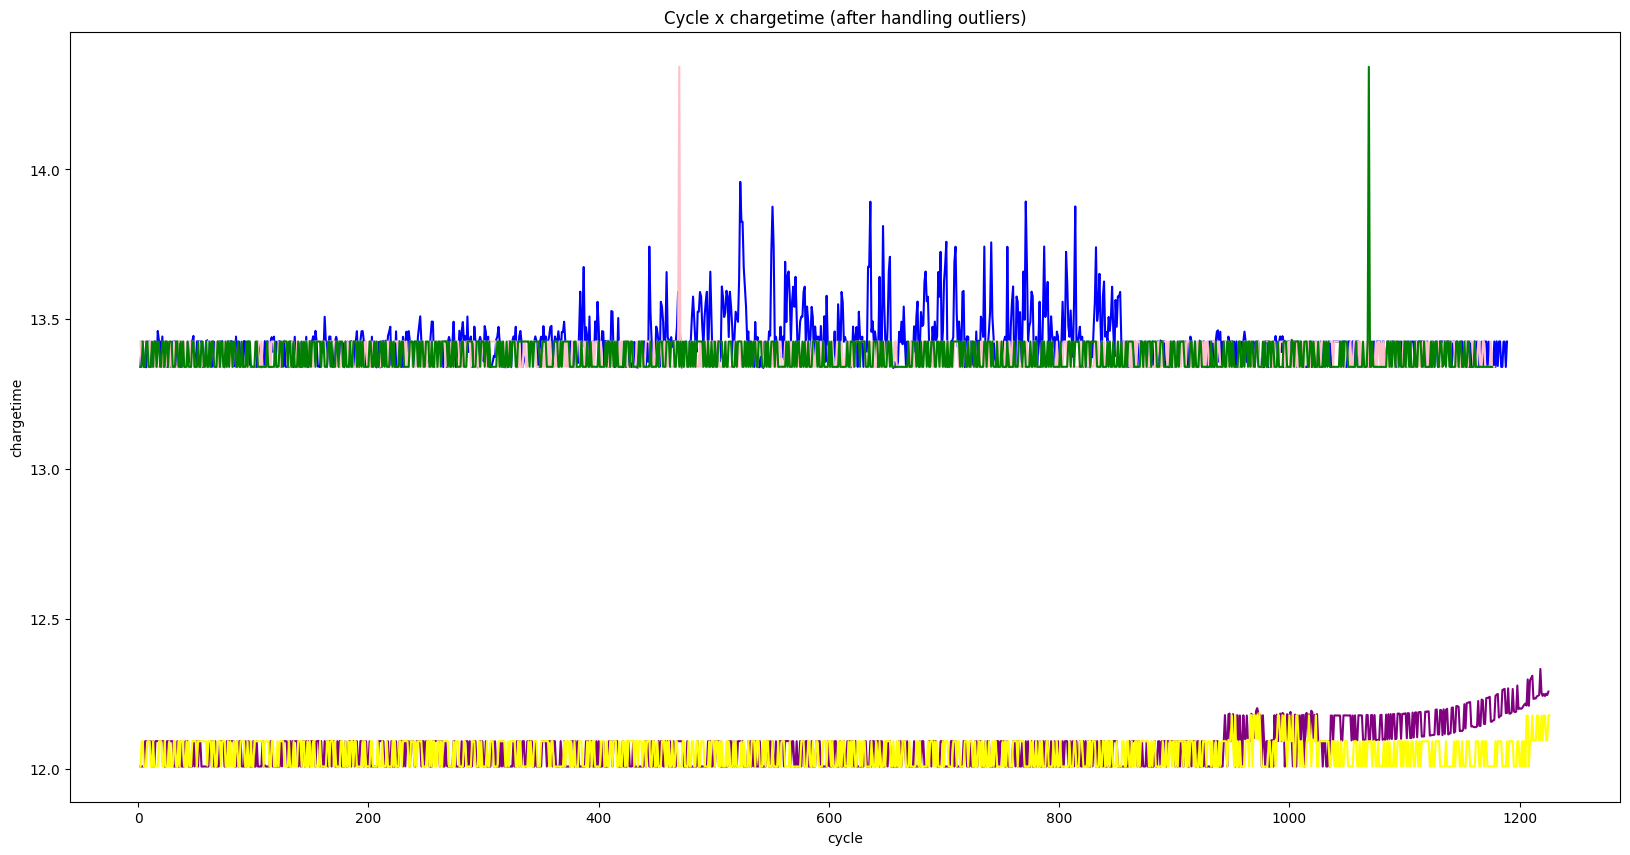

In [88]:
plt.title("Cycle x chargetime (after handling outliers)")
sns.lineplot(data=c0[2:], x='cycle', y='chargetime', color='blue')
sns.lineplot(data=c1[2:], x='cycle', y='chargetime', color='pink')
sns.lineplot(data=c2[2:], x='cycle', y='chargetime', color='green')
sns.lineplot(data=c3[2:], x='cycle', y='chargetime', color='purple')
sns.lineplot(data=c4[2:], x='cycle', y='chargetime', color='yellow')
plt.gcf().set_size_inches(20, 10)

Here we can check new outliers, such as in c1 and c2. We can also see that in all columns, the c0 has a different behavior compared to the other ones, so we won't use these one in the next steps.

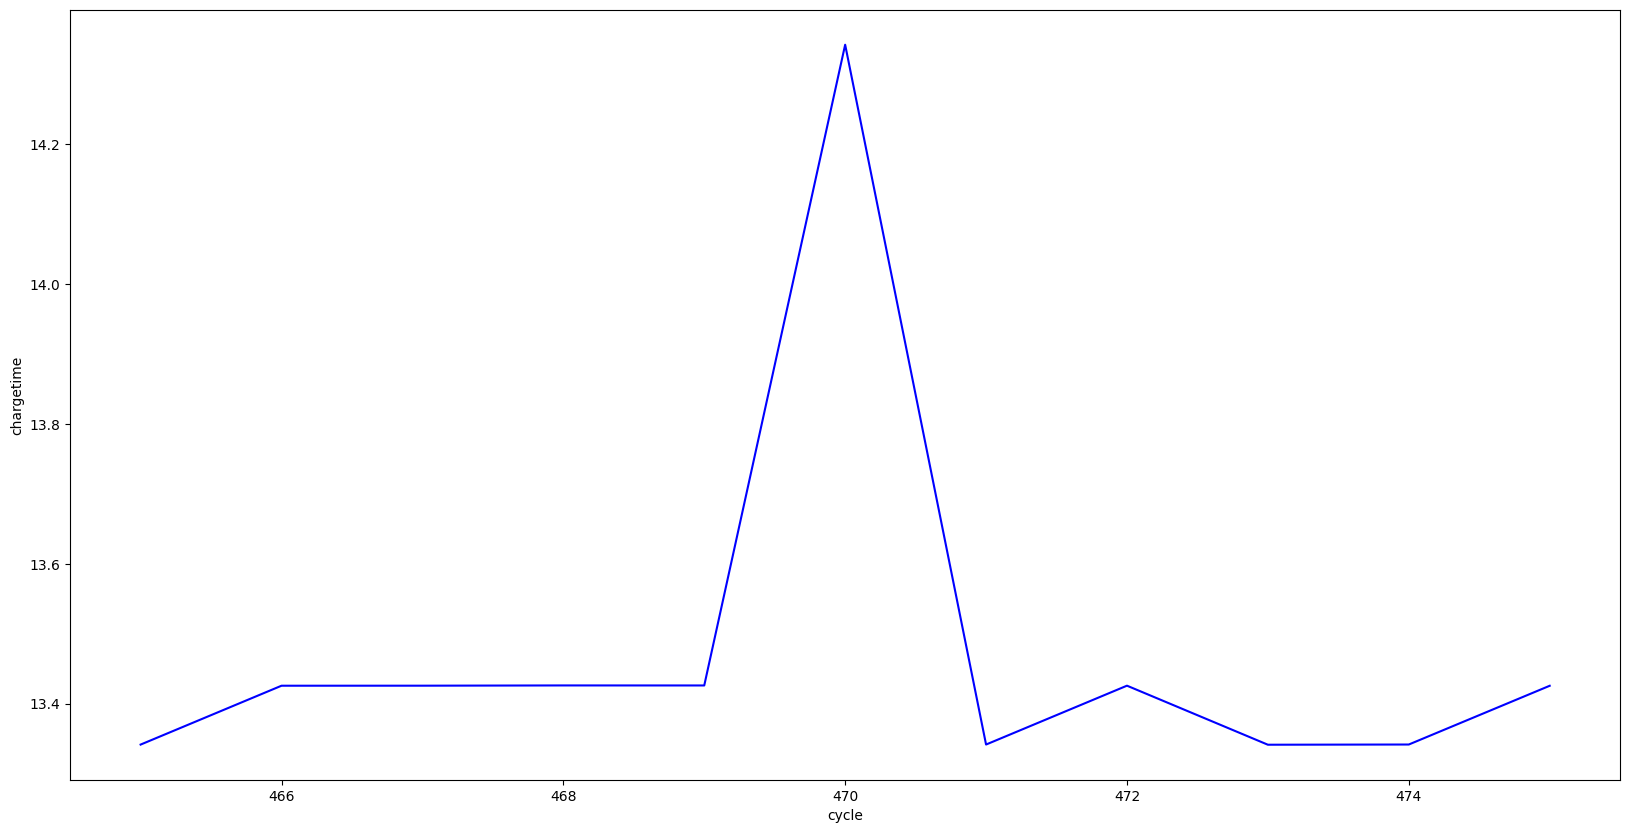

In [91]:
sns.lineplot(data=c1[465:475], x='cycle', y='chargetime', color='blue')
plt.gcf().set_size_inches(20, 10)

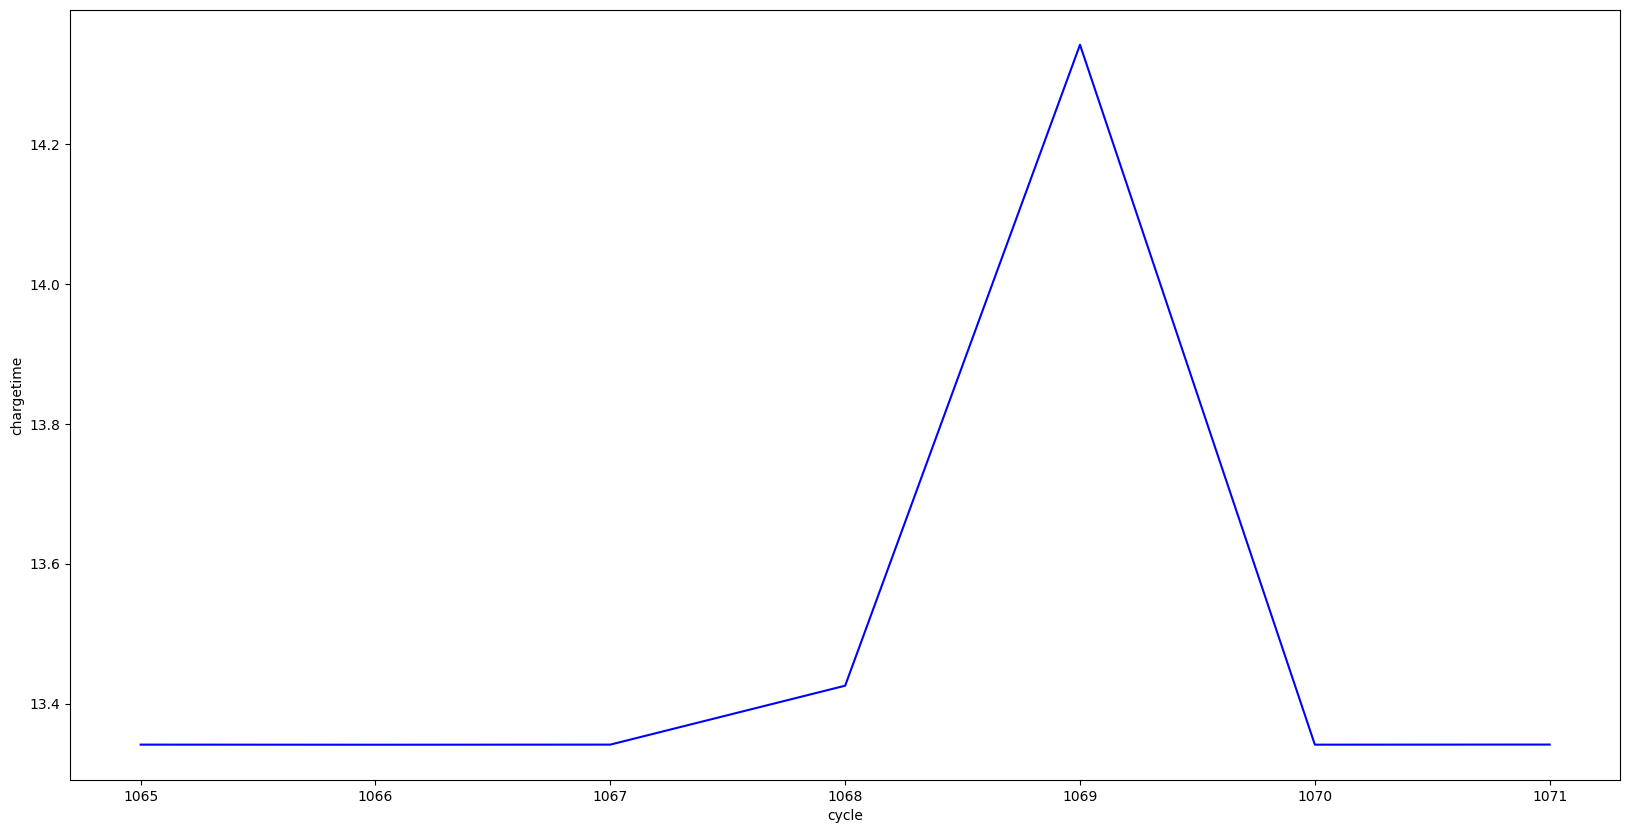

In [95]:
sns.lineplot(data=c2[1065:1071], x='cycle', y='chargetime', color='blue')
plt.gcf().set_size_inches(20, 10)

In [100]:
c1.loc[470, 'chargetime'] = c1.loc[468, 'chargetime']
c2.loc[1069, 'chargetime'] = c2.loc[1067, 'chargetime']

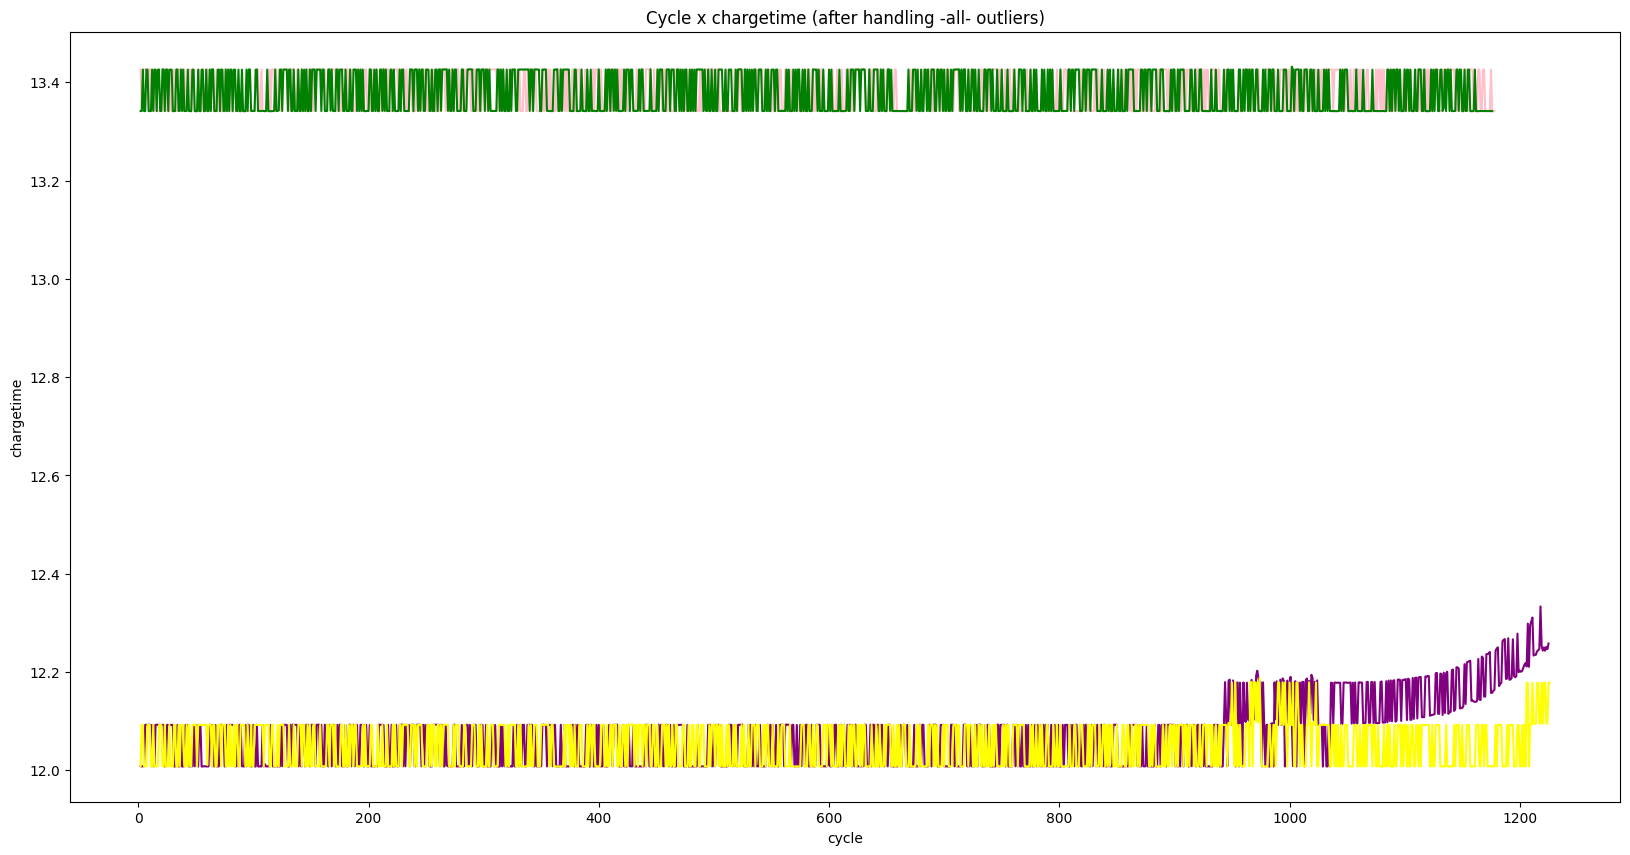

In [101]:
plt.title("Cycle x chargetime (after handling -all- outliers)")
sns.lineplot(data=c1[2:], x='cycle', y='chargetime', color='pink')
sns.lineplot(data=c2[2:], x='cycle', y='chargetime', color='green')
sns.lineplot(data=c3[2:], x='cycle', y='chargetime', color='purple')
sns.lineplot(data=c4[2:], x='cycle', y='chargetime', color='yellow')
plt.gcf().set_size_inches(20, 10)

Exporting the cleaned data.

In [103]:
c1.to_csv(r'./Data/c1.csv')
c2.to_csv(r'./Data/c2.csv')
c3.to_csv(r'./Data/c3.csv')
c4.to_csv(r'./Data/c4.csv')